In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys
import harmonypy as hm

# Use random module
import random 
random.seed(10)
print(random.random()) 


0.5714025946899135


In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set font to Arial
rcParams['font.family'] = 'Arial'

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sns.set_style("ticks")

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.1 louvain==0.7.1 pynndescent==0.5.8


In [4]:
# Step 1: Load the datasets
# Replace with your actual file paths
adata_10x =sc.read_h5ad("/home/julia/data/RPE_MEl_resubmission/RPE_MELANO_eye_with_annotation_with_MELANO.h5ad")
adata_smartseq =sc.read_h5ad("Smart_seq_hair.h5ad")

In [5]:
adata_smartseq.obs

,cell_identity,hair_cycle_stage,batch,mouse,genotype,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
gene_id,,,,,,,,,,
M7_P21_P1_A10_S5_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,3759,3758,52897.984375,1453.001953,2.746800
M7_P21_P2_G9_S256_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,6081,6078,632859.875000,27021.148438,4.269689
M7_P21_P1_A2_S1_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,3337,3337,61981.992188,1828.000000,2.949244
M7_P21_P2_H10_S267_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,6766,6762,559916.312500,17848.859375,3.187773
M7_P21_P1_A3_S2_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,4088,4085,89800.992188,2293.000000,2.553424
...,...,...,...,...,...,...,...,...,...,...
M12_cKO_P2_H2_S154_quant,Mc,Anagen_waxed,B6,M12,Bmpr1a_cKO,5708,5705,117769.992188,5366.981934,4.557173
M116_cKO_P3_H8_S256_quant,Mc,Anagen_waxed,B8,M116,Bmpr1a_cKO,4903,4900,124387.000000,2039.859009,1.639929
M12_cKO_P2_H3_S155_quant,Mc,Anagen_waxed,B6,M12,Bmpr1a_cKO,7094,7091,293053.968750,10998.703125,3.753132


In [6]:
adata_smartseq.obs['cell_type']='Melano_smart_seq'

In [7]:
adata_smartseq.obs

,cell_identity,hair_cycle_stage,batch,mouse,genotype,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,cell_type
gene_id,,,,,,,,,,,
M7_P21_P1_A10_S5_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,3759,3758,52897.984375,1453.001953,2.746800,Melano_smart_seq
M7_P21_P2_G9_S256_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,6081,6078,632859.875000,27021.148438,4.269689,Melano_smart_seq
M7_P21_P1_A2_S1_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,3337,3337,61981.992188,1828.000000,2.949244,Melano_smart_seq
M7_P21_P2_H10_S267_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,6766,6762,559916.312500,17848.859375,3.187773,Melano_smart_seq
M7_P21_P1_A3_S2_quant,aMcSC,AnagenI-II,B3,M7,Bmpr1a_WT,4088,4085,89800.992188,2293.000000,2.553424,Melano_smart_seq
...,...,...,...,...,...,...,...,...,...,...,...
M12_cKO_P2_H2_S154_quant,Mc,Anagen_waxed,B6,M12,Bmpr1a_cKO,5708,5705,117769.992188,5366.981934,4.557173,Melano_smart_seq
M116_cKO_P3_H8_S256_quant,Mc,Anagen_waxed,B8,M116,Bmpr1a_cKO,4903,4900,124387.000000,2039.859009,1.639929,Melano_smart_seq
M12_cKO_P2_H3_S155_quant,Mc,Anagen_waxed,B6,M12,Bmpr1a_cKO,7094,7091,293053.968750,10998.703125,3.753132,Melano_smart_seq


In [8]:
# Step 2: Preprocess the 10x dataset
sc.pp.filter_genes(adata_10x, min_cells=3)
sc.pp.filter_cells(adata_10x, min_genes=200)
sc.pp.normalize_total(adata_10x, target_sum=1e4)  # Normalize counts to 10,000 per cell
sc.pp.log1p(adata_10x)  # Log-transform the data
adata_10x.obs["batch"] = "10x"  # Add batch metadata

# Step 3: Preprocess the Smart-seq dataset
sc.pp.filter_genes(adata_smartseq, min_cells=3)
sc.pp.filter_cells(adata_smartseq, min_genes=200)
sc.pp.normalize_total(adata_smartseq, target_sum=1e4)  # Normalize counts to 10,000 per cell
sc.pp.log1p(adata_smartseq)  # Log-transform the data
adata_smartseq.obs["batch"] = "smartseq"  # Add batch metadata

# Step 4: Concatenate datasets
# Automatically aligns datasets based on shared genes
adata = adata_10x.concatenate(adata_smartseq, batch_key="batch", batch_categories=["10x", "smartseq"],join='outer')

filtered out 581 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
filtered out 58 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [9]:
adata

AnnData object with n_obs × n_vars = 17955 × 28954
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'cells', 'cell_type', 'batch', 'cell_identity', 'hair_cycle_stage', 'mouse', 'genotype'
    var: 'gene_ids-10x', 'n_cells-10x', 'mt-10x', 'n_cells_by_counts-10x', 'mean_counts-10x', 'pct_dropout_by_counts-10x', 'total_counts-10x', 'n_cells-smartseq', 'mt-smartseq', 'n_cells_by_counts-smartseq', 'mean_counts-smartseq', 'pct_dropout_by_counts-smartseq', 'total_counts-smartseq'
    layers: 'counts', 'raw_counts'

In [10]:
adata.var=adata.var.drop(columns = 
[ 'gene_ids-10x', 'n_cells-10x', 'mt-10x', 'n_cells_by_counts-10x', 'mean_counts-10x', 'pct_dropout_by_counts-10x', 'total_counts-10x', 'n_cells-smartseq', 'mt-smartseq', 'n_cells_by_counts-smartseq', 'mean_counts-smartseq', 'pct_dropout_by_counts-smartseq', 'total_counts-smartseq'                                
                                   ], axis = 1) 

In [11]:
# Step 5: Identify highly variable genes
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)# Select top 2000 highly variable genes
adata.raw = adata
adata = adata[:, adata.var.highly_variable]  # Keep only highly variable genes

# Step 6: Scale the data and perform PCA
sc.pp.scale(adata, max_value=10)  # Scale data to unit variance and zero mean
sc.tl.pca(adata, svd_solver="arpack", n_comps=120)  # Perform PCA


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=120
    finished (0:00:19)


In [12]:
adata1=adata.copy()

2025-01-15 10:05:43,850 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-01-15 10:05:59,195 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-01-15 10:05:59,489 - harmonypy - INFO - Iteration 1 of 5
2025-01-15 10:06:08,766 - harmonypy - INFO - Iteration 2 of 5
2025-01-15 10:06:17,609 - harmonypy - INFO - Iteration 3 of 5
2025-01-15 10:06:25,834 - harmonypy - INFO - Iteration 4 of 5
2025-01-15 10:06:34,666 - harmonypy - INFO - Converged after 4 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:34)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:33)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


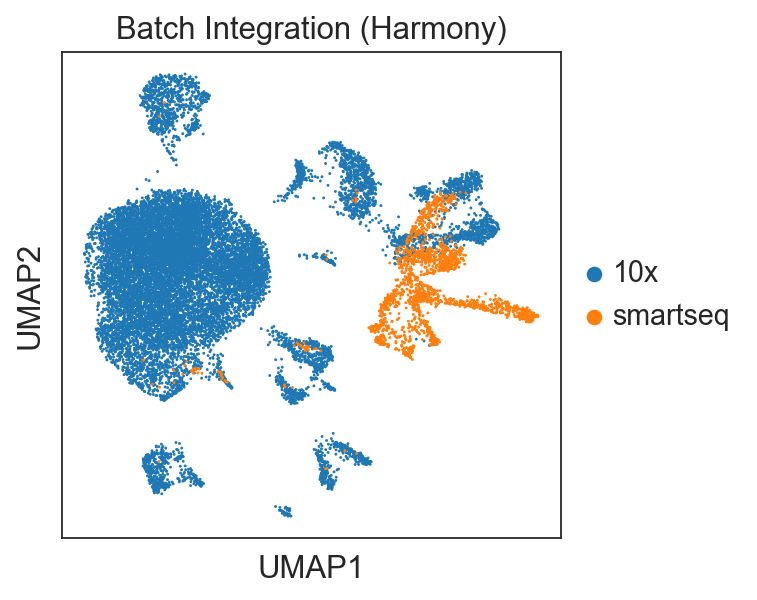

In [13]:
# Step 7: Run Harmony for batch correction
harmony_out = hm.run_harmony(
    adata1.obsm["X_pca"], 
    adata1.obs, 
    "batch", 
    theta=3.0,           # Increase theta to reduce integration strength
   # lambda=0.5,      # Reduce lambda for weaker regularization
    max_iter_harmony=5,  # Limit number of iterations
   # epsilon_cluster=1e-3 # Loosen clustering convergence
)

adata1.obsm["X_pca_harmony"] = harmony_out.Z_corr.T  # Save Harmony-adjusted embeddings

# Step 8: Compute neighbors and UMAP using Harmony-adjusted PCA
sc.pp.neighbors(adata1, use_rep="X_pca_harmony",   n_pcs=30,
    n_neighbors=60)  # Use Harmony embeddings for neighbor graph
sc.tl.umap(adata1)  # Compute UMAP for visualization
sc.tl.leiden(adata1)

# Step 9: Visualization
# Plot UMAP colored by batch and other relevant annotations (e.g., cell type, clusters)
sc.pl.umap(adata1, color=["batch"], title="Batch Integration (Harmony)")


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


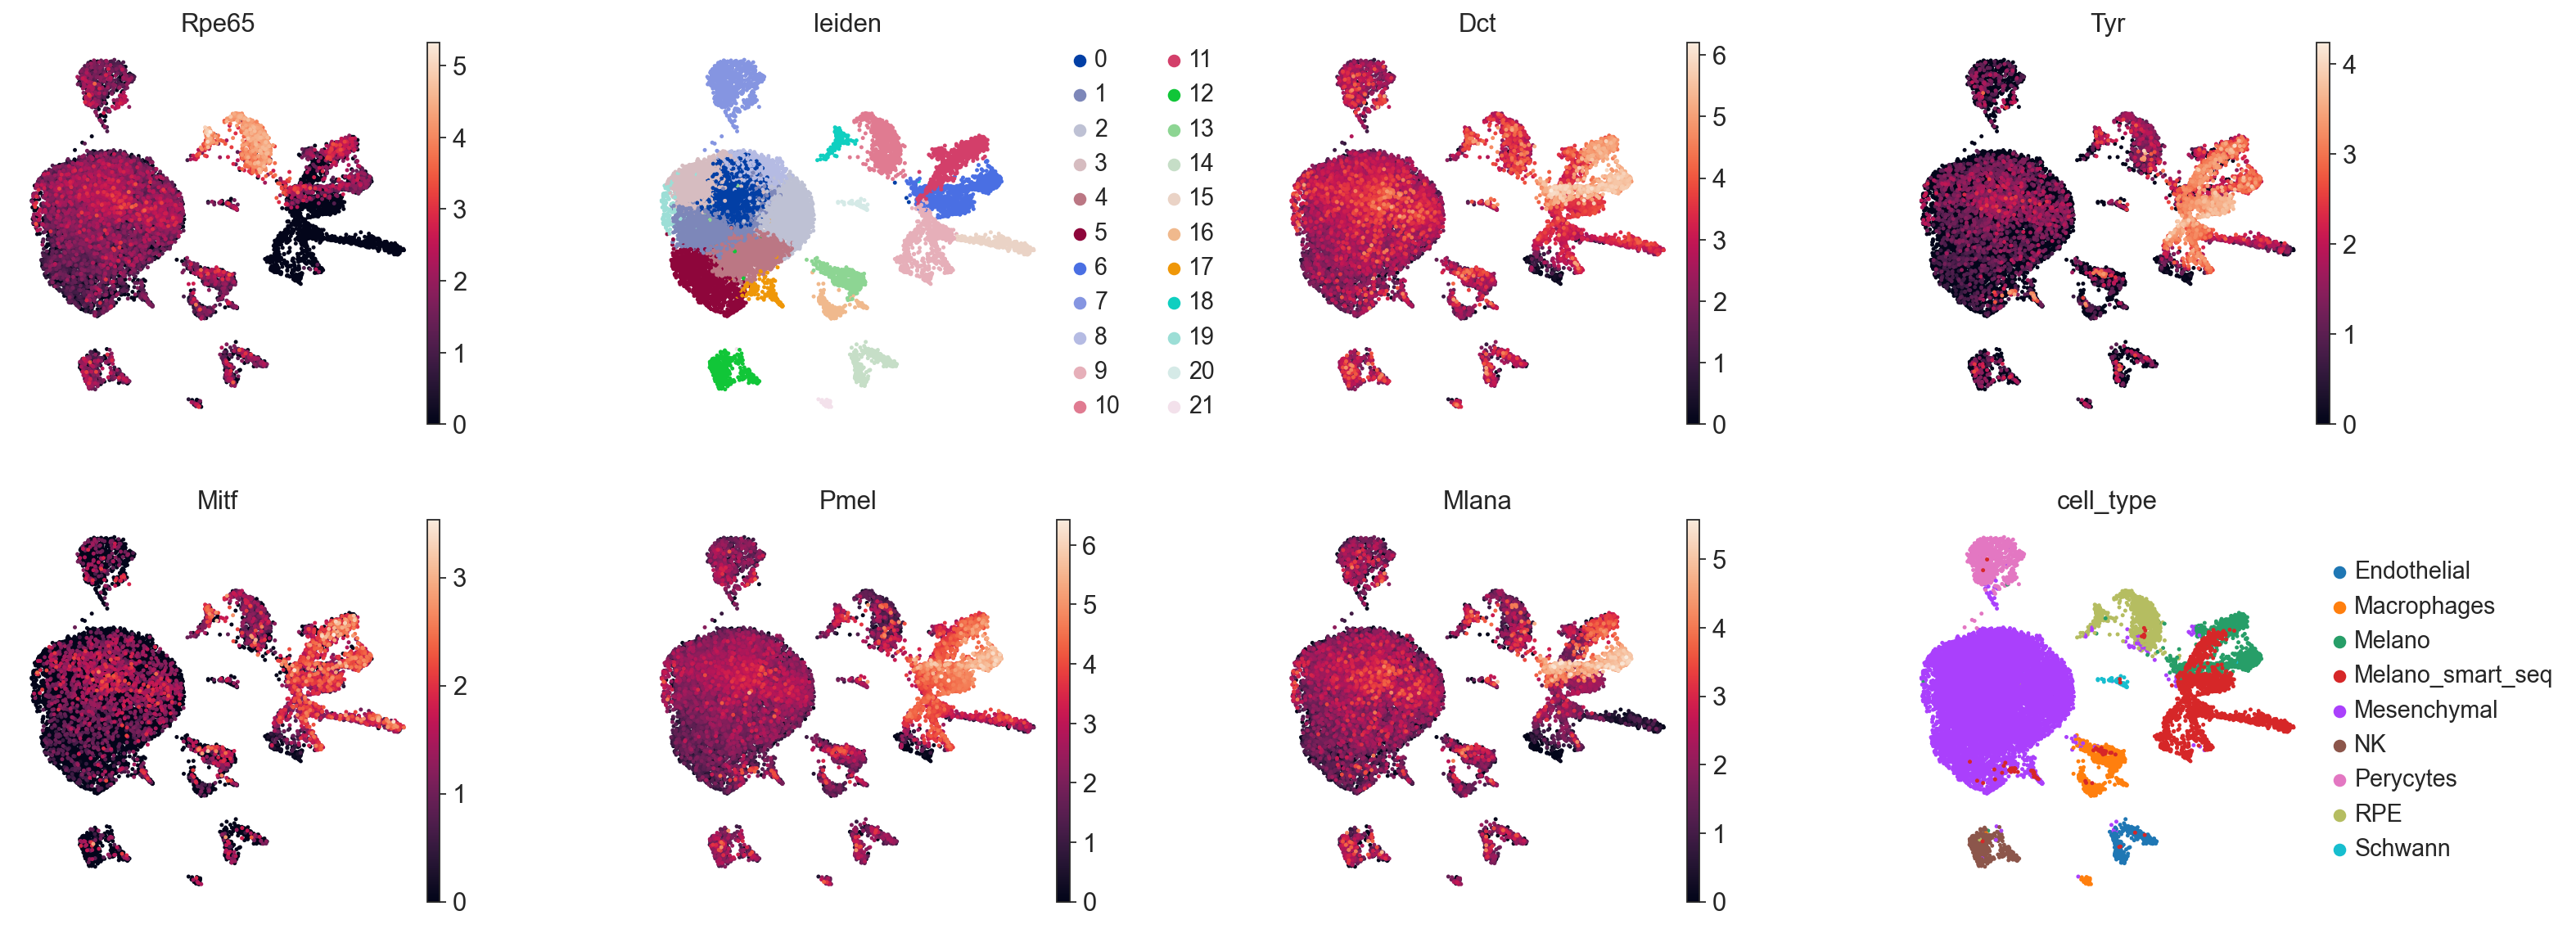

In [14]:
sc.pl.umap(adata1, color=["Rpe65","leiden",  "Dct", "Tyr", "Mitf", "Pmel", "Mlana", 'cell_type'],
            wspace=0.4, frameon=False, use_raw=True, size=20)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


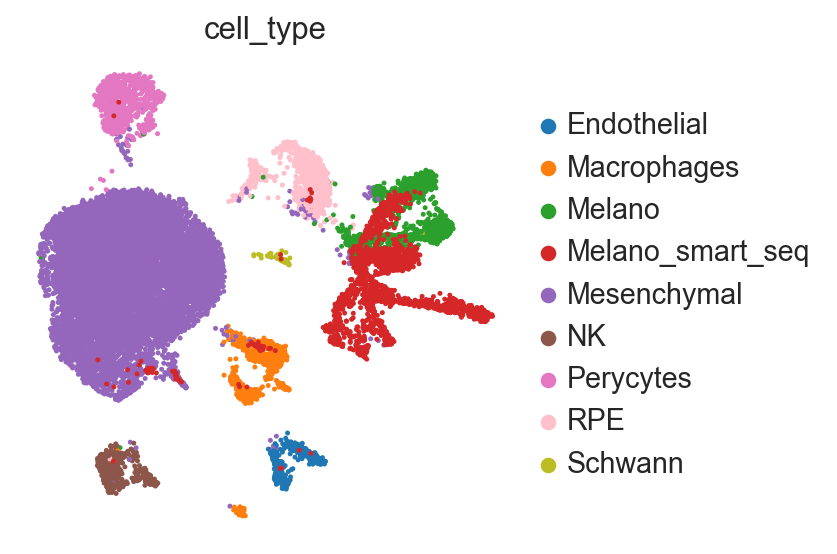

In [15]:
import matplotlib.pyplot as plt

# Define a custom color palette
custom_colors = {
    "Endothelial": "#1f77b4",
    "Melano_smart_seq": "#d62728",  # Use the same color as "PD4" here
    "Macrophages": "#ff7f0e",
    "Melano": "#2ca02c",
    "Mesenchymal": "#9467bd",
    "NK": "#8c564b",
    "Perycytes": "#e377c2",
    "RPE": "pink",
    "Schwann": "#bcbd22",
}

# Ensure 'cell_type' is a category
adata1.obs['cell_type'] = adata1.obs['cell_type'].astype('category')

# Assign custom colors to `adata1.uns['cell_type_colors']`
adata1.uns['cell_type_colors'] = [custom_colors[cat] for cat in adata1.obs['cell_type'].cat.categories]

# Plot UMAP with consistent colors
sc.pl.umap(
    adata1,
    color=["cell_type"],
    palette=adata1.uns['cell_type_colors'],  # Use `cell_type_colors`
    frameon=False,
    size=20,
    save="Melano_smart_seq.pdf"
)


In [16]:
adata_combined2=adata1.copy()
import pandas as pd

# Inspect the unique cell types
print(adata_combined2.obs['cell_type'].unique())

# Define which clusters should be merged (e.g., all starting with "Melano")
melano_clusters = ['Melano', 'Melano_smart_seq']  # Adjust based on the actual names in your data

# Create a new column with updated cell types
adata_combined2.obs['cell_type_merged'] = adata_combined2.obs['cell_type']

# Update the new column: merge Melano clusters
adata_combined2.obs['cell_type_merged'] = adata_combined2.obs['cell_type_merged'].replace(
    melano_clusters, 'Melano_combined'
)

# Verify the update
print(adata_combined2.obs['cell_type_merged'].unique())

['Melano', 'Perycytes', 'Mesenchymal', 'NK', 'Macrophages', 'Endothelial', 'RPE', 'Schwann', 'Melano_smart_seq']
Categories (9, object): ['Endothelial', 'Macrophages', 'Melano', 'Melano_smart_seq', ..., 'NK', 'Perycytes', 'RPE', 'Schwann']
['Melano_combined', 'Perycytes', 'Mesenchymal', 'NK', 'Macrophages', 'Endothelial', 'RPE', 'Schwann']
Categories (8, object): ['Endothelial', 'Macrophages', 'Melano_combined', 'Mesenchymal', 'NK', 'Perycytes', 'RPE', 'Schwann']


In [17]:
genes1=[
       "Dct", "Mlana", "Pmel",'Mitf','Tyrp1', 'Gpnmb','Mgll',
        "Ttr",   "Rgr","Rpe65", 'Rdh5','Mt3','Trpm3',
        "Dcn", "Serpine2", "Igfbp4", "Lum", "Cygb", "Apod",
         "Acta2", "Myh11", "Rgs5", "Tagln", "Mustn1", "Myl9",
         "Cd74", "H2-Aa",  "Lyz2", "Il1b",  "Cd83", "Tyrobp", 
        "Nkg7", "AW112010", "Rac2", "Vps37b", "Ms4a4b",  "Hcst",
          "Plvap", "Egfl7",  "Flt1",  "Cldn5", "Ptprb", "Plpp1",
         "Gfra3", "Kcna1",  "Plp1", "Gpm6b", "Prnp", "Dbi"]

Index(['Melano_combined', 'RPE', 'Mesenchymal', 'Perycytes', 'Macrophages',
       'NK', 'Endothelial', 'Schwann'],
      dtype='object')


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


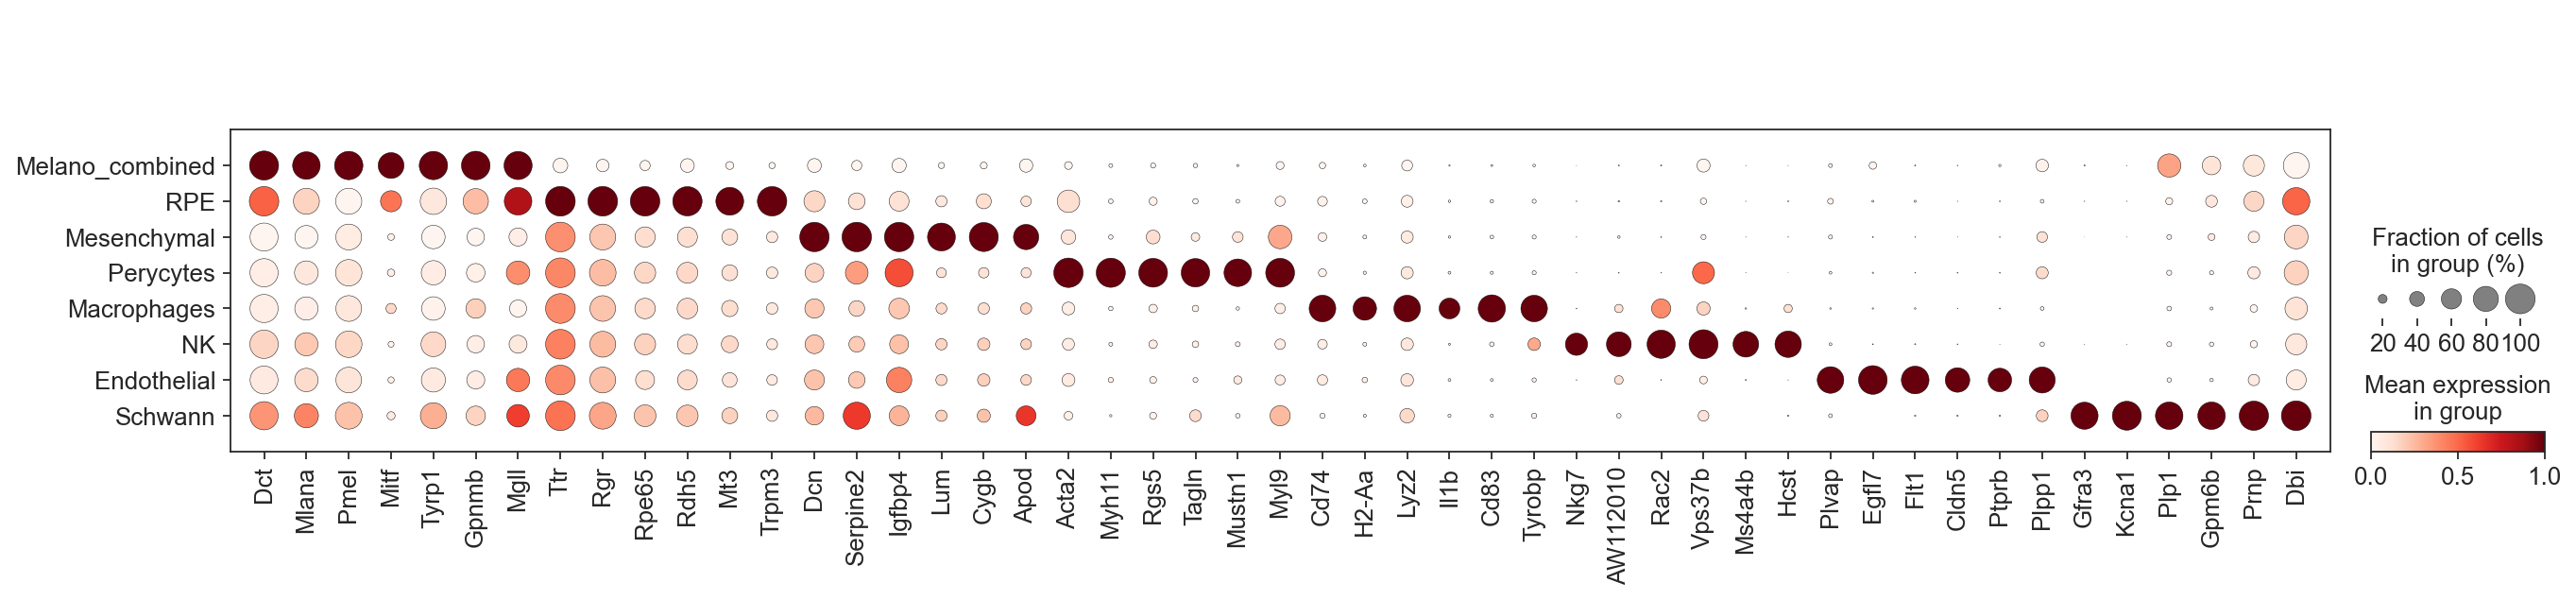

In [18]:
desired_order = [
    'Melano_combined',
    'RPE',
    'Mesenchymal',
    'Perycytes',
    'Macrophages',
    'NK',
    'Endothelial',
    'Schwann'
]

# Set the categorical order in the 'cell_type_merged' column
adata_combined2.obs['cell_type_merged'] = pd.Categorical(
    adata_combined2.obs['cell_type_merged'], 
    categories=desired_order, 
    ordered=True
)

# Verify the updated order
print(adata_combined2.obs['cell_type_merged'].cat.categories)

# Plot the dot plot with the specified order
sc.pl.dotplot(
    adata_combined2,
    var_names=genes1,  # Replace with your gene list
    groupby='cell_type_merged',
    standard_scale='var'
)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


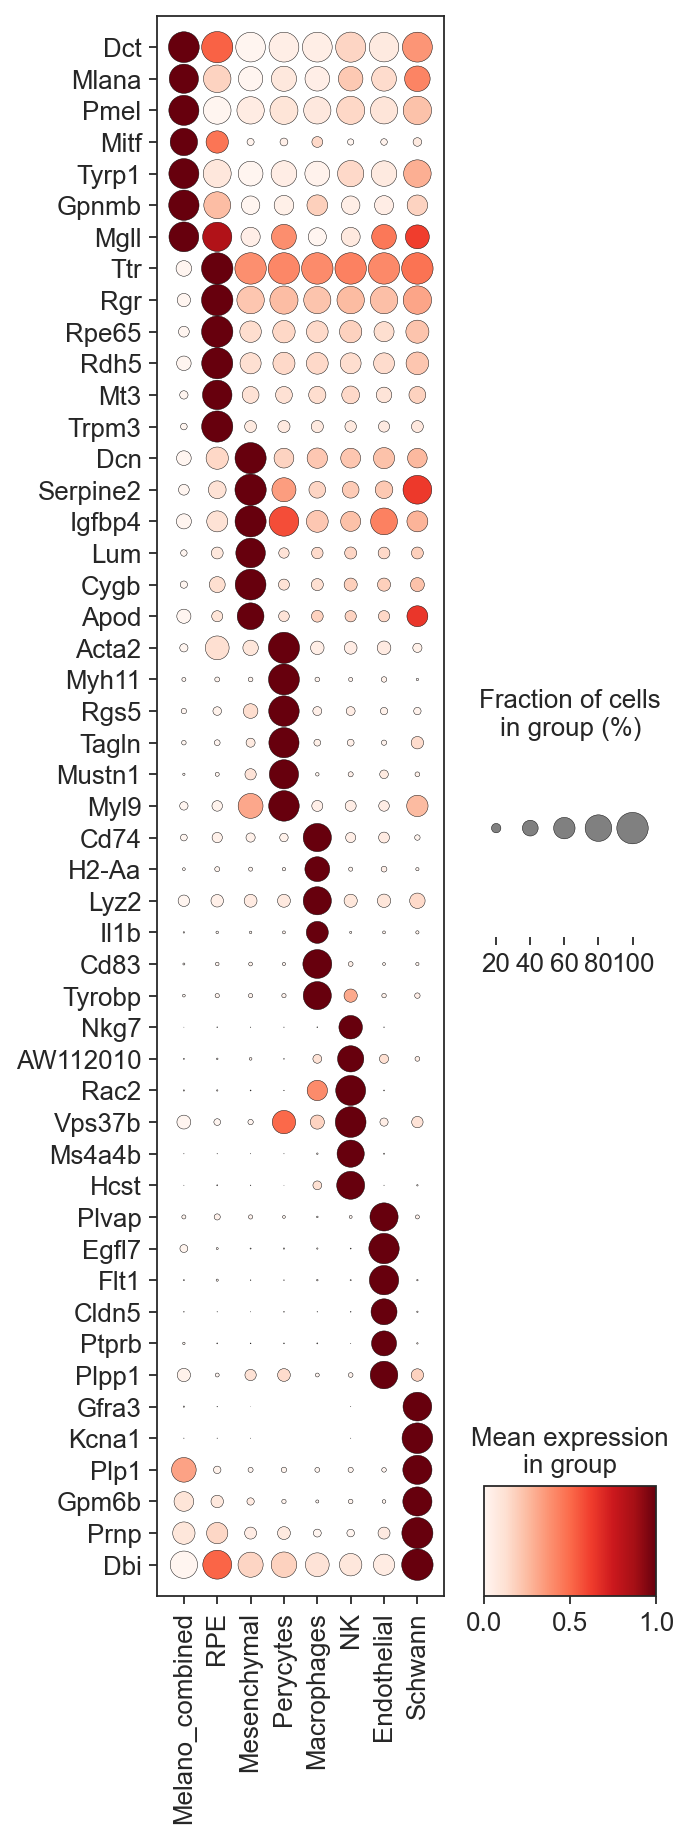

In [19]:
sc.pl.dotplot(
    adata_combined2,
    var_names=genes1,  # Replace with your gene list
    groupby='cell_type_merged',
    standard_scale='var', 
    figsize=(4, 13),  # Adjust the figsize to accommodate the vertical layout
    swap_axes=True,  # This makes the plot vertical
    save='Smart_seq_png_dot_6_vertical.png'
)


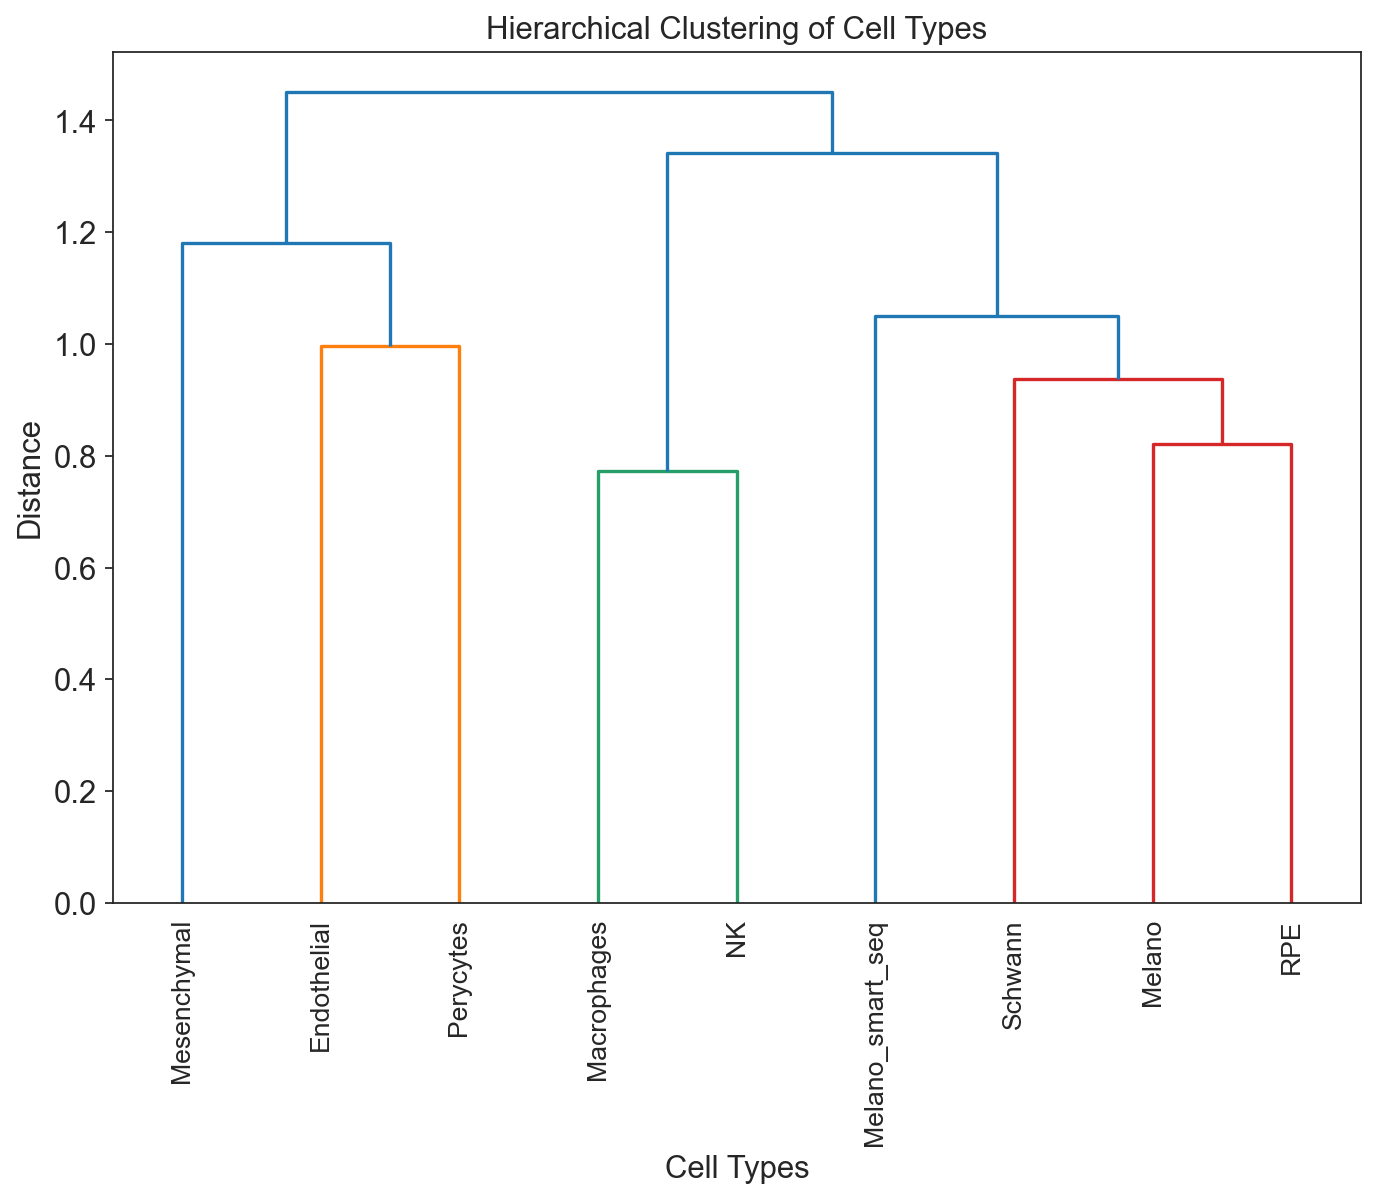

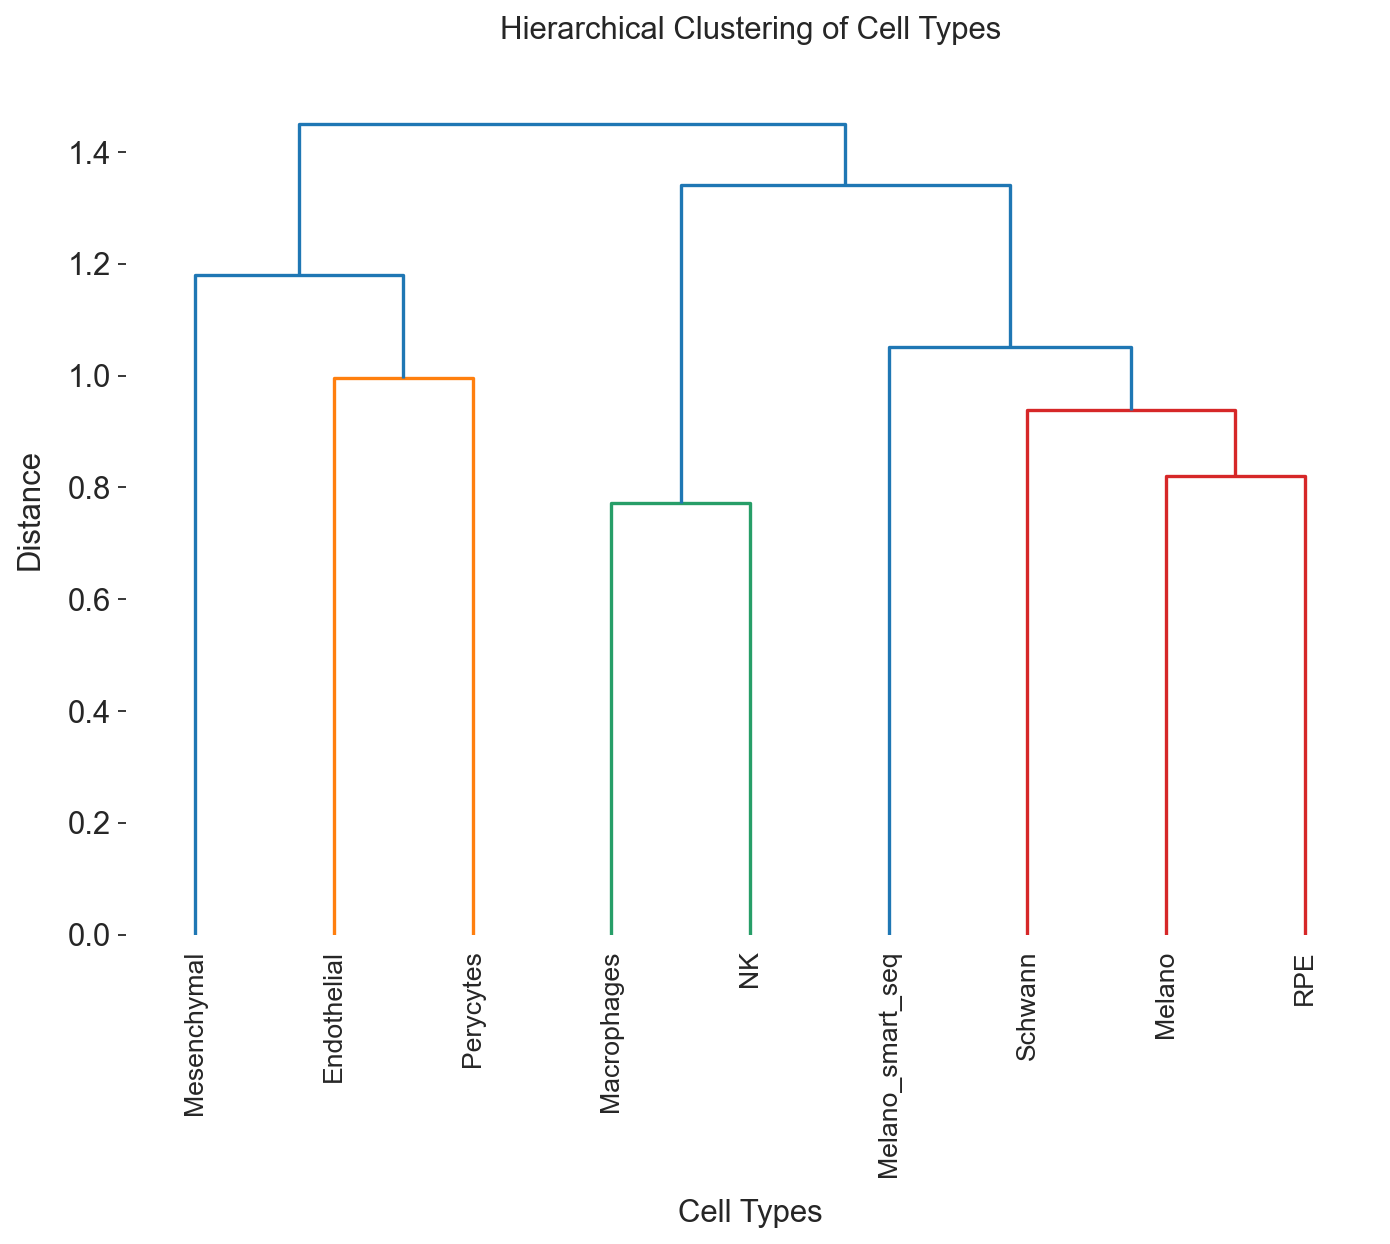

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Aggregate gene expression by cell type
adata1.obs['cell_type'] = adata1.obs['cell_type'].astype('category')  # Ensure 'cell_type' is categorical
mean_expression = adata1.to_df().groupby(adata1.obs['cell_type']).mean()  # Mean expression per cell type

from scipy.spatial.distance import pdist, squareform

# Compute pairwise distances (e.g., correlation distance)
distance_matrix = pdist(mean_expression, metric='correlation')  # Can use 'euclidean', 'cosine', etc.


# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')  # Use 'ward', 'average', or 'complete' linkage

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix, 
    labels=mean_expression.index,  # Use cell type names as labels
    leaf_rotation=90, 
    leaf_font_size=12
)
plt.title("Hierarchical Clustering of Cell Types")
plt.xlabel("Cell Types")
plt.ylabel("Distance")
plt.show()


# Plot the dendrogram without a frame
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix, 
    labels=mean_expression.index,  # Use cell type names as labels
    leaf_rotation=90, 
    leaf_font_size=12
)
plt.title("Hierarchical Clustering of Cell Types", pad=20)
plt.xlabel("Cell Types", labelpad=10)
plt.ylabel("Distance", labelpad=10)

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()

# Cassiopea table prep

In [21]:
adata_hvg= adata1.copy()
adata_hvg=adata_hvg.raw.to_adata()

In [22]:
import pandas as pd
import numpy as np
import scipy.sparse as sp


# Assuming 'adata' is your AnnData object and 'leiden' is the clustering annotation
# Create a DataFrame to store the results
cluster_gene_expression = {}

# Iterate over each cluster
for cluster in adata_hvg.obs['cell_type'].unique():
    # Subset the adata object to the current cluster
    cluster_data = adata_hvg[adata_hvg.obs['cell_type'] == cluster]
    
    # Ensure cluster_data.X is dense if it's sparse
    if sp.issparse(cluster_data.X):
        cluster_data_matrix = cluster_data.X.toarray()
    else:
        cluster_data_matrix = cluster_data.X
    
    # Calculate the fraction of cells expressing each gene
    fraction_expressing = (cluster_data_matrix > 0).sum(axis=0) / cluster_data.n_obs
    
    # Filter genes expressed in at least 10% of the cells
    genes_expressed = np.array(adata_hvg.var_names)[fraction_expressing >0.1]
    
    # Store the results in a dictionary
    cluster_gene_expression[cluster] = genes_expressed

# Convert the results into a readable format
cluster_gene_expression_df = pd.DataFrame(
    dict([(k, pd.Series(v)) for k, v in cluster_gene_expression.items()])
)

# Save the results to a CSV file
#cluster_gene_expression_df.to_csv("genes_expressed_in_clusters.csv", index=False)

#print("Genes expressed in at least 10% of cells for each cluster saved to 'genes_expressed_in_clusters.csv'.")


In [23]:
cluster_gene_expression_df

,Melano,Perycytes,Mesenchymal,NK,Macrophages,Endothelial,RPE,Schwann,Melano_smart_seq
0,0610009B22Rik,0610009L18Rik,0610009B22Rik,0610010K14Rik,0610010K14Rik,0610010K14Rik,0610009B22Rik,0610009L18Rik,0610009L18Rik
1,0610010K14Rik,0610010K14Rik,0610009L18Rik,0610012G03Rik,0610012G03Rik,0610012G03Rik,0610009L18Rik,0610010K14Rik,0610010K14Rik
2,0610012G03Rik,0610012G03Rik,0610010K14Rik,1110004F10Rik,1110004F10Rik,1110004F10Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik
3,1110004F10Rik,1110004F10Rik,0610012G03Rik,1110008P14Rik,1110008P14Rik,1110008P14Rik,0610012G03Rik,1110004F10Rik,0610038B21Rik
4,1110008P14Rik,1110008P14Rik,1110004F10Rik,1110012L19Rik,1110032A03Rik,1110038B12Rik,0610030E20Rik,1110008P14Rik,1110002L01Rik
...,...,...,...,...,...,...,...,...,...
11784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mt-Nd4
11785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mt-Nd5
11786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mt-Nd6
11787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mt-Rnr1


In [24]:
with open('/home/julia/data/Scenic_database/Mouse/TF/allTFs_mm.txt', 'r') as file:
    list_tf = []
    for line in file.read().split('\n'):
            
                list_tf.append(line)
                
print(list_tf)

['Bcl6b', 'Zscan26', 'Mtf1', 'Klf9', 'Zic5', 'Zfp410', 'Zfp3', 'Zfp691', 'Zfp637', 'Egr3', 'Klf12', 'Bcl6', 'Tfap2a', 'Tfap2b', 'Tfap2c', 'Tfap2e', 'Arid3a', 'Arid5a', 'Ascl2', 'Tcf3', 'Bhlhe40', 'Myf6', 'Max', 'Mafk', 'Atf1', 'Jdp2', 'Mafb', 'Glis2', 'Plagl1', 'Osr2', 'Sp4', 'Klf7', 'Zbtb7b', 'Zic1', 'Egr1', 'Zfp281', 'Hic1', 'Zfp740', 'Osr1', 'Zbtb14', 'Zbtb12', 'Zscan4c', 'Zfp105', 'Zfp128', 'Zic2', 'Zic3', 'Zbtb3', 'E2f3', 'E2f2', 'Spi1', 'Elf3', 'Gabpa', 'Ehf', 'Spdef', 'Foxj3', 'Foxj1', 'Foxa2', 'Foxk1', 'Foxl1', 'Gata6', 'Gata3', 'Gata5', 'Gcm1', 'Six6', 'Nkx3-1', 'Hnf1a', 'Hoxa3', 'Irf9', 'Irf3', 'Irf4', 'Irf6', 'Irf5', 'Srf', 'Myb', 'Mybl1', 'Rxra', 'Hnf4a', 'Esrra', 'Nr2f2', 'Rara', 'Rfx4', 'Rfx7', 'Rfx3', 'Sp100', 'Gmeb1', 'Smad3', 'Tcf7', 'Hbp1', 'Cic', 'Bbx', 'Sox8', 'Tcf7l2', 'Sox17', 'Lef1', 'Sox30', 'Sox15', 'Sox5', 'Sox18', 'Sox12', 'Sox14', 'Tcf7l1', 'Sox21', 'Sox7', 'Sox11', 'Sry', 'Sox13', 'Sox4', 'Sox1', 'Eomes', 'Tbp', 'Cux1', 'Lhx2', 'Hoxb6', 'Hoxa10', 'Hoxa4', '

In [25]:
# Convert the list of transcription factors to a set for faster lookups
set_tf = set(list_tf)

In [26]:
# Create a DataFrame with transcription factors as rows and clusters as columns
tf_df = pd.DataFrame(index=list_tf, columns=cluster_gene_expression_df.columns)

# Populate the DataFrame
for cluster in cluster_gene_expression_df.columns:
    # Check if each TF is present in the cluster's gene list
    cluster_genes = set(cluster_gene_expression_df[cluster].dropna())  # Drop NaN values
    tf_df[cluster] = [gene in cluster_genes for gene in list_tf]

# Convert boolean values to True/False explicitly if necessary
tf_df = tf_df.applymap(bool)

# Save the resulting DataFrame to a CSV file
#tf_df.to_csv("tf_intersection_clusters.csv")

#print("DataFrame with transcription factors as rows and clusters as columns saved to 'tf_intersection_clusters.csv'.")


In [27]:
tf_df

,Melano,Perycytes,Mesenchymal,NK,Macrophages,Endothelial,RPE,Schwann,Melano_smart_seq
Bcl6b,False,False,False,False,False,True,False,False,False
Zscan26,True,False,False,False,False,True,True,False,True
Mtf1,False,False,False,False,False,False,True,False,True
Klf9,True,True,True,True,True,True,True,True,True
Zic5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
Zscan4b,False,False,False,False,False,False,False,False,False
Zscan4e,False,False,False,False,False,False,False,False,False
Zswim1,False,False,False,False,False,False,False,False,True
Zxdb,False,False,False,False,False,False,False,False,False


In [28]:
# Assuming 'tf_df' is the DataFrame with True/False values
# Convert True/False to 1/0
tf_df = tf_df.astype(int)
tf_df
# Save the resulting DataFrame to a CSV file
#tf_df.to_csv("tf_presence_as_binary.csv")

#print("DataFrame with 1/0 representation saved to 'tf_presence_as_binary.csv'.")

,Melano,Perycytes,Mesenchymal,NK,Macrophages,Endothelial,RPE,Schwann,Melano_smart_seq
Bcl6b,0,0,0,0,0,1,0,0,0
Zscan26,1,0,0,0,0,1,1,0,1
Mtf1,0,0,0,0,0,0,1,0,1
Klf9,1,1,1,1,1,1,1,1,1
Zic5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Zscan4b,0,0,0,0,0,0,0,0,0
Zscan4e,0,0,0,0,0,0,0,0,0
Zswim1,0,0,0,0,0,0,0,0,1
Zxdb,0,0,0,0,0,0,0,0,0


In [29]:
# Assuming 'tf_df' is the DataFrame with 1/0 representation

# Filter rows where not all values are 0 or 1
filtered_tf_df = tf_df[(tf_df.sum(axis=1) != 0) & (tf_df.sum(axis=1) != tf_df.shape[1])]
filtered_tf_df
# Save the filtered DataFrame to a CSV file
#filtered_tf_df.to_csv("cassiopea_folders_24_12/filtered_tf_2000_hv.csv")

#print("Filtered DataFrame saved to 'filtered_tf_binary.csv'.")

,Melano,Perycytes,Mesenchymal,NK,Macrophages,Endothelial,RPE,Schwann,Melano_smart_seq
Bcl6b,0,0,0,0,0,1,0,0,0
Zscan26,1,0,0,0,0,1,1,0,1
Mtf1,0,0,0,0,0,0,1,0,1
Zfp410,0,0,0,0,0,0,0,0,1
Zfp3,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
Zfp975,0,0,0,0,0,0,0,0,1
Zfp976,0,0,0,0,0,0,0,0,1
Zhx2,0,0,0,0,0,0,0,0,1
Zrsr1,0,0,0,0,0,0,1,0,0


In [30]:
filtered_tf_df.to_csv("Cassiopea_table_Smart_seq.csv")

In [31]:
adata1

AnnData object with n_obs × n_vars = 17955 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'cells', 'cell_type', 'batch', 'cell_identity', 'hair_cycle_stage', 'mouse', 'genotype', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'raw_counts'
    obsp: 'distances', 'connectivities'

In [32]:
print(adata1.obs.dtypes)


n_genes                 int64
n_genes_by_counts       int64
total_counts          float32
total_counts_mt       float32
pct_counts_mt         float32
doublet_score         float64
predicted_doublet      object
cells                category
cell_type            category
batch                category
cell_identity        category
hair_cycle_stage     category
mouse                category
genotype             category
leiden               category
dtype: object


In [33]:
for col in adata1.obs.columns:
    if adata1.obs[col].dtype not in ['category', 'string']:
        adata1.obs[col] = adata1.obs[col].astype(str)


In [34]:
adata1.write_h5ad('Smart_seq_Final.h5ad')